In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualizing the dataset


In [3]:
import matplotlib.pyplot as plt


In [4]:
x_train.shape

(60000, 28, 28)

mnist dataset have total size of 60k images

In [11]:
single_image= x_train[0]

visualizing one image on 0 index from mnist dataset

In [12]:
single_image.shape

(28, 28)

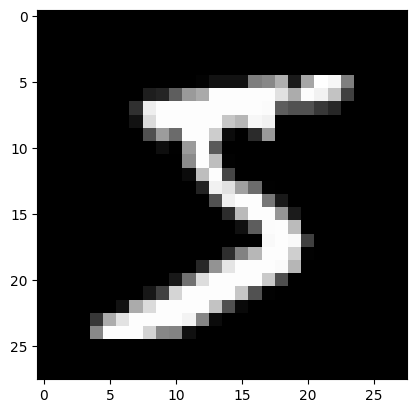

In [13]:
plt.imshow(single_image,cmap='gray')

In [14]:
# Pre-processing


In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(60000,)

In [18]:
y_example= to_categorical(y_train)

In [19]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
y_example.shape

(60000, 10)

In [21]:
y_cat_train = to_categorical(y_train,10)

In [22]:
y_cat_test = to_categorical(y_test,10)

In [23]:
single_image.max()

255

In [24]:
single_image.min()

0

In [25]:
x_train= x_train/255
x_test= x_test/255

In [26]:
scaled_image = x_train[0]

In [27]:
scaled_image.max()

1.0

In [28]:
scaled_image.min()

0.0

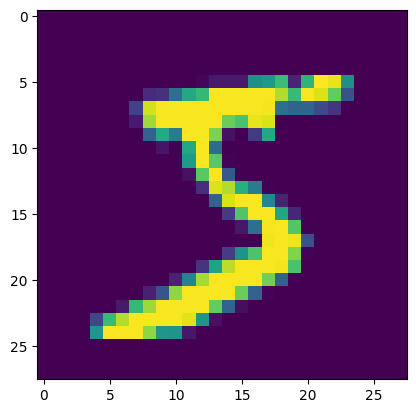

In [29]:
plt.imshow(scaled_image)

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
x_train = x_train.reshape(60000,28,28,1)

In [32]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
x_test = x_test.reshape(10000,28,28,1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

Model

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [47]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size= (3,3),input_shape= (28,28,1), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters=16, kernel_size=(4,4),activation='relu'))

model.add(Flatten())

model.add (Dense (128, activation = 'relu'))

model.add (Dense (10, activation = 'softmax'))





In [48]:
model.compile( loss ='categorical_crossentropy',
              optimizer='rmsprop',
               metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        8208      
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               204928    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [50]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1281 - accuracy: 0.9604
Epoch 2/2
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0438 - accuracy: 0.9868


In [51]:
model.metrics_names

['loss', 'accuracy']

In [52]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0383 - accuracy: 0.9872


[0.03830171376466751, 0.9872000217437744]

In [53]:
from sklearn.metrics import classification_report

In [54]:
import numpy as np

In [55]:
predictions=model.predict(x_test)
prediction_classes = np.argmax(predictions,axis=1)

313/313 [==============================] - 2s 8ms/step


In [56]:
report = classification_report(y_test,prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

